**Here I document the steps taken to extract faces from training images using MTCNN. This is in reference to this [blog](https://towardsdatascience.com/whats-the-difference-between-haar-feature-classifiers-and-convolutional-neural-networks-ce6828343aeb) and after my struggles with detecting tilted faces using HAAR cascades.**

# Setting up the path

In [0]:
import os
import shutil

In [0]:
import time
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pd.set_option('max_colwidth', -1)
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [6]:
!pip install mtcnn

In [7]:
from mtcnn import MTCNN

Using TensorFlow backend.


In [8]:
%cd drive/

/content/drive


In [9]:
%cd My\ Drive

/content/drive/My Drive


In [10]:
%cd case\ studies\ 2

/content/drive/My Drive/case studies 2


In [11]:
!ls

'1-Gathering Data.ipynb'	       'Data Augmentation'
'2-Gathering files information.ipynb'  'Face Dataset'
'3-Data Pre-Processing.ipynb'	        Final_Face_Dataset
'4-Gathering Raw Waveforms.ipynb'       mel_spectrograms
'5-Concatenating Raw Waveforms.ipynb'   raw_data


In [12]:
%cd Final_Face_Dataset/

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [13]:
!ls

 final_test_data.csv	  'MTCNN experiments'   training_set
 final_training_data.csv   testing_set


In [0]:
train_df = pd.read_csv('final_training_data.csv')

In [15]:
train_df.head()

,Unnamed: 0,images,label
0,0,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi
1,1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi
2,2,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi
3,3,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi
4,4,Yoriko_Kawaguchi - _0_9563.jpg,Yoriko_Kawaguchi


In [16]:
%cd training_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [0]:
training_path = os.getcwd()

In [18]:
image_path = []
for i in train_df['images']:
  path = training_path + '/' + i
  image_path.append(path)
train_df['image_path'] = image_path
train_df.head()

,Unnamed: 0,images,label,image_path
0,0,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_6007.jpg
1,1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8892.jpg
2,2,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_7536.jpg
3,3,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8708.jpg
4,4,Yoriko_Kawaguchi - _0_9563.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_9563.jpg


In [19]:
#del train_df['label_count']
del train_df['Unnamed: 0']
train_df.head()

,images,label,image_path
0,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_6007.jpg
1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8892.jpg
2,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_7536.jpg
3,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8708.jpg
4,Yoriko_Kawaguchi - _0_9563.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_9563.jpg


In [20]:
train_df.loc[~train_df['image_path'].str.contains('jpg')]

,images,label,image_path


In [21]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set


In [22]:
len(train_df)

42500

In [0]:
training_df = train_df

In [24]:
training_df.head()

,images,label,image_path
0,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_6007.jpg
1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8892.jpg
2,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_7536.jpg
3,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8708.jpg
4,Yoriko_Kawaguchi - _0_9563.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_9563.jpg


In [25]:
training_df.shape

(42500, 3)

In [26]:
training_df['label'].nunique()

170

In [27]:
training_df['label'].value_counts(dropna = False)

Ari_Fleischer                 250
Trent_Lott                    250
Juan_Carlos_Ferrero           250
Paradorn_Srichaphan           250
Tommy_Thompson                250
Gloria_Macapagal_Arroyo       250
Adrien_Brody                  250
Condoleezza_Rice              250
Meryl_Streep                  250
Junichiro_Koizumi             250
Colin_Powell                  250
Pete_Sampras                  250
Tom_Cruise                    250
Heizo_Takenaka                250
John_Paul_II                  250
Michael_Schumacher            250
Dominique_de_Villepin         250
Gonzalo_Sanchez_de_Lozada     250
Jimmy_Carter                  250
Charles_Taylor                250
Laura_Bush                    250
Jennifer_Lopez                250
Jennifer_Capriati             250
Naomi_Watts                   250
Joe_Lieberman                 250
Michael_Jackson               250
Atal_Bihari_Vajpayee          250
Britney_Spears                250
Gerhard_Schroeder             250
Andy_Roddick  

In [28]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [29]:
!ls

 final_test_data.csv	  'MTCNN experiments'   training_set
 final_training_data.csv   testing_set


# MTCNN warm-up

In [30]:
detector = MTCNN()
img = cv2.imread(training_df['image_path'][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = detector.detect_faces(img)

In [0]:
faces

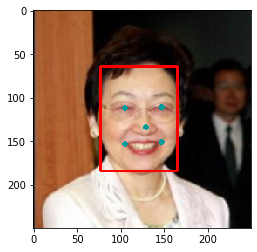

In [0]:
cv2.rectangle(img, (77, 64), (77+88, 64+120), (255, 0, 0), 2)
cv2.circle(img, (105, 112), 2, (0, 155, 155), 2)
cv2.circle(img, (105, 153), 2, (0, 155, 155), 2)
cv2.circle(img, (147, 151), 2, (0, 155, 155), 2)
cv2.circle(img, (129, 134), 2, (0, 155, 155), 2)
cv2.circle(img, (147, 111), 2, (0, 155, 155), 2)
plt.imshow(img)

In [0]:
len(faces)

2

In [0]:
box = []
for i in faces:
  print(i['box'])
  #box.append(i['box'])
  for keypoints in [i['keypoints']]:
    print(keypoints['left_eye'])
    print(keypoints['right_eye'])
    print(keypoints['mouth_left'])
    print(keypoints['mouth_right'])
    print(keypoints['nose'])
    

[77, 64, 88, 120]
(105, 112)
(147, 111)
(105, 153)
(147, 151)
(129, 134)
[208, 71, 34, 45]
(220, 88)
(237, 89)
(220, 106)
(235, 107)
(229, 98)


In [0]:
for face in faces:
  print(face['box'])
  print(face['keypoints'])
  print(face['keypoints']['left_eye'])
  print(face['keypoints']['right_eye'])
  print(face['keypoints']['mouth_left'])
  print(face['keypoints']['mouth_right'])
  print(face['keypoints']['nose'])

[77, 64, 88, 120]
{'left_eye': (105, 112), 'right_eye': (147, 111), 'nose': (129, 134), 'mouth_left': (105, 153), 'mouth_right': (147, 151)}
(105, 112)
(147, 111)
(105, 153)
(147, 151)
(129, 134)
[208, 71, 34, 45]
{'left_eye': (220, 88), 'right_eye': (237, 89), 'nose': (229, 98), 'mouth_left': (220, 106), 'mouth_right': (235, 107)}
(220, 88)
(237, 89)
(220, 106)
(235, 107)
(229, 98)


In [0]:
crop = []
for i in range(len(faces)):
  for face[i] in faces:
    for (x,y,w,h) in [face[i]['box']]:
      cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
    for (x,y) in [face[i]['keypoints']['left_eye']]:
      cv2.circle(img, (x,y), 2, (0,155,155), 2)
    for (x,y) in [face[i]['keypoints']['right_eye']]:
      cv2.circle(img, (x,y), 2, (0,155,155), 2)
    for (x,y) in [face[i]['keypoints']['mouth_left']]:
      cv2.circle(img, (x,y), 2, (0,155,155), 2)
    for (x,y) in [face[i]['keypoints']['mouth_right']]:
      cv2.circle(img, (x,y), 2, (0,155,155), 2)
    for (x,y) in [face[i]['keypoints']['nose']]:
      cv2.circle(img, (x,y), 2, (0,155,155), 2)
  #plt.imshow(img)

    for (x,y,w,h) in [face[i]['box']]:
      
      roi = img[y:y+h, x:x+w]
      crop.append(roi)
for j in range(len(crop)):
  cv2.imwrite(training_df['label'][0] + '-' + str(i) + '.jpg', crop[j])

In [0]:
crop = []
for face in faces:
  #for i in range(len(faces)):
  #for face in faces:
  for a,b,c,d,e in zip([face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['nose']]):
    cv2.circle(img, a, 2, (0,155,155), 2)
    cv2.circle(img, b, 2, (0,155,155), 2)
    cv2.circle(img, c, 2, (0,155,155), 2)
    cv2.circle(img, d, 2, (0,155,155), 2)
    cv2.circle(img, e, 2, (0,155,155), 2)
  for (x,y,w,h) in [face['box']]:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
    roi = img[y:y+h, x:x+w]
    crop.append(roi)
      #cv2.imwrite(training_df_0_100['label'][0] + '-' + str(i) + '.jpg', roi)
for i in range(len(crop)):
  cv2.imwrite(training_df_0_100['label'][0] + '-' + str(i) + '.jpg', crop[i])

In [0]:
len(crop)

2

In [0]:
crop[0].shape

(120, 88, 3)

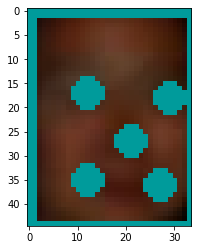

In [0]:
plt.imshow(crop[1])

In [28]:
!ls

 final_test_data.csv	  'MTCNN experiments'   training_set
 final_training_data.csv   testing_set


In [29]:
%cd MTCNN\ experiments

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments


In [0]:
!ls

In [0]:
os.mkdir('training_0_100')

In [0]:
%cd training_0_100/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/training_0_100


In [0]:
training_0_100 = os.getcwd()

# Testing MTCNN for first 100 training images

Here I implement face detection and cropping for the 1st 100 images in the training dataset.

In [0]:
detector = MTCNN()
training_df_0_100 = training_df.iloc[:100, :]
training_df_0_100.shape

(100, 3)

In [0]:
training_df_0_100.head()

,images,label,image_path
0,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_6007.jpg
1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8892.jpg
2,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_7536.jpg
3,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8708.jpg
4,Yoriko_Kawaguchi - _0_9563.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_9563.jpg


In [0]:
faces_found_0_100 = []
cropped_image_0_100 = []
image_0_100 = []
label_0_100 = []
for i in range(len(training_df_0_100)):
  img = cv2.imread(training_df_0_100['image_path'][i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  faces = detector.detect_faces(img)
  #faces_found.append(len(faces))
  for face in faces:
    for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
      cv2.circle(img, a, 2, (0,155,155), 2)
      cv2.circle(img, b, 2, (0,155,155), 2)
      cv2.circle(img, c, 2, (0, 155, 155), 2)
      cv2.circle(img, d, 2, (0,155,155), 2)
      cv2.circle(img, e, 2, (0,155,155), 2)
    for (x,y,w,h) in [face['box']]:
      cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
      roi = img[y:y+h, x:x+w]
      cropped_image.append(roi)
      image.append(training_df_0_100['images'][i])
      label.append(training_df_0_100['label'][i])
      faces_found.append(len(faces))
      if len(image)%10 == 0:
        print(len(image))




10
20
30
40
50
60
70
80
90
100
110


In [0]:
df_0_100 = pd.DataFrame(columns = ['faces_found','image', 'label'])
df_0_100['label'] = label
df_0_100['image'] = image

df_0_100['faces_found'] = faces_found
df_0_100.head()

,faces_found,image,label
0,2,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi
1,2,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi
2,1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi
3,1,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi
4,1,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi


In [0]:
df_0_100.loc[df_0_100['faces_found']!=1].index

Int64Index([ 0,  1, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 56,
            57, 62, 63, 80, 81, 82, 83],
           dtype='int64')

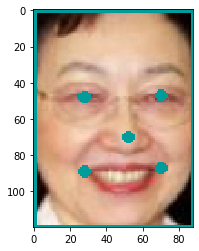

In [0]:
plt.imshow(cropped_image[0])

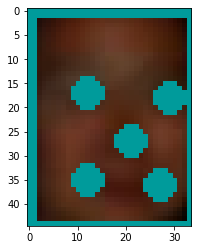

In [0]:
plt.imshow(cropped_image[1])

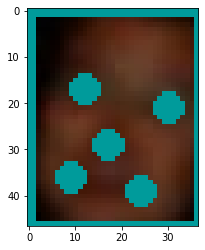

In [0]:
plt.imshow(cropped_image[30])

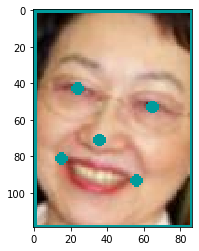

In [0]:
plt.imshow(cropped_image[31])

# MTCNN for training images

In [31]:
!pwd

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments


In [0]:
!ls

In [0]:
%cd MTCNN experiments

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments


In [0]:
!ls

 training_0_100   'Yoriko_Kawaguchi -0.jpg'
 Untitled0.ipynb  'Yoriko_Kawaguchi -1.jpg'


In [0]:
start = time.time()

training_df_0_1000 = training_df.iloc[:1000, :]
faces_found_0_1000 = []
cropped_image_0_1000 = []
image_0_1000 = []
label_0_1000 = []
for i in range(len(training_df_0_1000)):
  try:
    img = cv2.imread(training_df_0_1000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_0_1000.append(roi)
        image_0_1000.append(training_df_0_1000['images'][i])
        label_0_1000.append(training_df_0_1000['label'][i])
        faces_found_0_1000.append(len(faces))
        if len(image_0_1000)%100 == 0:
          print(len(image_0_1000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_0_1000.append('error')
    image_0_1000.append(training_df_0_1000['images'][i])
    label_0_1000.append(training_df_0_1000['label'][i])
    faces_found_0_1000.append('error')

df_0_1000 = pd.DataFrame(columns = ['faces_found_0_1000','image_0_1000', 'label_0_1000'])
df_0_1000['label_0_1000'] = label_0_1000
df_0_1000['image_0_1000'] = image_0_1000
df_0_1000['faces_found_0_1000'] = faces_found_0_1000
print(len(df_0_1000))
print(df_0_1000['faces_found_0_1000'].value_counts(dropna = False))
df_0_1000.to_csv('df_0_1000.csv')
np.save('cropped_image_0_1000', cropped_image_0_1000)

100
7.791268825531006
200
36.221861600875854
300
63.126327991485596
400
90.09966230392456
500
112.28431129455566
600
132.78475427627563
700
173.3611717224121
800
210.5289249420166
900
245.19193172454834
1000
278.2408707141876
1100
308.810222864151
1200
334.94005250930786
1226
1    792
2    382
3    48 
4    4  
Name: faces_found_0_1000, dtype: int64


In [0]:
start = time.time()

training_df_1000_2000 = training_df.iloc[1000:2000, :]
training_df_1000_2000 = training_df_1000_2000.reset_index(drop = True)
faces_found_1000_2000 = []
cropped_image_1000_2000 = []
image_1000_2000 = []
label_1000_2000 = []
for i in range(len(training_df_1000_2000)):
  try:
    img = cv2.imread(training_df_1000_2000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_1000_2000.append(roi)
        image_1000_2000.append(training_df_1000_2000['images'][i])
        label_1000_2000.append(training_df_1000_2000['label'][i])
        faces_found_1000_2000.append(len(faces))
        if len(image_1000_2000)%100 == 0:
          print(len(image_1000_2000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_1000_2000.append('error')
    image_1000_2000.append(training_df_1000_2000['images'][i])
    label_1000_2000.append(training_df_1000_2000['label'][i])
    faces_found_1000_2000.append('error')

df_1000_2000 = pd.DataFrame(columns = ['faces_found_1000_2000','image_1000_2000', 'label_1000_2000'])
df_1000_2000['label_1000_2000'] = label_1000_2000
df_1000_2000['image_1000_2000'] = image_1000_2000
df_1000_2000['faces_found_1000_2000'] = faces_found_1000_2000
print(len(df_1000_2000))
print(df_1000_2000['faces_found_1000_2000'].value_counts(dropna = False))
df_1000_2000.to_csv('df_1000_2000.csv')
np.save('cropped_image_1000_2000', cropped_image_1000_2000)

100
29.527300357818604
200
66.5913143157959
300
94.10793995857239
400
124.91033935546875
500
162.73865222930908
600
196.88342213630676
700
235.57553505897522
800
273.4128267765045
900
306.7284288406372
1000
336.2705407142639
1100
363.54692244529724
1117
1    883
2    228
3    6  
Name: faces_found_1000_2000, dtype: int64


In [0]:
start = time.time()

training_df_2000_3000 = training_df.iloc[2000:3000, :]
training_df_2000_3000 = training_df_2000_3000.reset_index(drop = True)
faces_found_2000_3000 = []
cropped_image_2000_3000 = []
image_2000_3000 = []
label_2000_3000 = []
for i in range(len(training_df_2000_3000)):
  try:
    img = cv2.imread(training_df_2000_3000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_2000_3000.append(roi)
        image_2000_3000.append(training_df_2000_3000['images'][i])
        label_2000_3000.append(training_df_2000_3000['label'][i])
        faces_found_2000_3000.append(len(faces))
        if len(image_2000_3000)%100 == 0:
          print(len(image_2000_3000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_2000_3000.append('error')
    image_2000_3000.append(training_df_2000_3000['images'][i])
    label_2000_3000.append(training_df_2000_3000['label'][i])
    faces_found_2000_3000.append('error')

df_2000_3000 = pd.DataFrame(columns = ['faces_found_2000_3000','image_2000_3000', 'label_2000_3000'])
df_2000_3000['label_2000_3000'] = label_2000_3000
df_2000_3000['image_2000_3000'] = image_2000_3000
df_2000_3000['faces_found_2000_3000'] = faces_found_2000_3000
print(len(df_2000_3000))
print(df_2000_3000['faces_found_2000_3000'].value_counts(dropna = False))
df_2000_3000.to_csv('df_2000_3000.csv')
np.save('cropped_image_2000_3000', cropped_image_2000_3000)

100
26.500136137008667
200
56.07458734512329
300
96.05695605278015
400
127.69087481498718
500
148.8556625843048
600
170.36220479011536
700
199.23637437820435
800
236.99347949028015
900
289.0459518432617
1000
328.0520944595337
1100
363.6832001209259
1163
1    837
2    320
3    6  
Name: faces_found_2000_3000, dtype: int64


In [0]:
start = time.time()

training_df_3000_4000 = training_df.iloc[3000:4000, :]
training_df_3000_4000 = training_df_3000_4000.reset_index(drop = True)
faces_found_3000_4000 = []
cropped_image_3000_4000 = []
image_3000_4000 = []
label_3000_4000 = []
for i in range(len(training_df_3000_4000)):
  try:
    img = cv2.imread(training_df_3000_4000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_3000_4000.append(roi)
        image_3000_4000.append(training_df_3000_4000['images'][i])
        label_3000_4000.append(training_df_3000_4000['label'][i])
        faces_found_3000_4000.append(len(faces))
        if len(image_3000_4000)%100 == 0:
          print(len(image_3000_4000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_3000_4000.append('error')
    image_3000_4000.append(training_df_3000_4000['images'][i])
    label_3000_4000.append(training_df_3000_4000['label'][i])
    faces_found_3000_4000.append('error')

df_3000_4000 = pd.DataFrame(columns = ['faces_found_3000_4000','image_3000_4000', 'label_3000_4000'])
df_3000_4000['label_3000_4000'] = label_3000_4000
df_3000_4000['image_3000_4000'] = image_3000_4000
df_3000_4000['faces_found_3000_4000'] = faces_found_3000_4000
print(len(df_3000_4000))
print(df_3000_4000['faces_found_3000_4000'].value_counts(dropna = False))
df_3000_4000.to_csv('df_3000_4000.csv')
np.save('cropped_image_3000_4000', cropped_image_3000_4000)

100
31.620957374572754
200
64.75579142570496
300
86.83548164367676
400
121.20288300514221
500
168.62086415290833
600
212.82195448875427
700
249.29064393043518
800
287.42657494544983
900
332.41666769981384
1000
371.30678057670593
1100
403.4089729785919
1150
1    884
2    164
3    102
Name: faces_found_3000_4000, dtype: int64


In [0]:
start = time.time()

training_df_4000_5000 = training_df.iloc[4000:5000, :]
training_df_4000_5000 = training_df_4000_5000.reset_index(drop = True)
faces_found_4000_5000 = []
cropped_image_4000_5000 = []
image_4000_5000 = []
label_4000_5000 = []
for i in range(len(training_df_4000_5000)):
  try:
    img = cv2.imread(training_df_4000_5000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_4000_5000.append(roi)
        image_4000_5000.append(training_df_4000_5000['images'][i])
        label_4000_5000.append(training_df_4000_5000['label'][i])
        faces_found_4000_5000.append(len(faces))
        if len(image_4000_5000)%100 == 0:
          print(len(image_4000_5000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_4000_5000.append('error')
    image_4000_5000.append(training_df_4000_5000['images'][i])
    label_4000_5000.append(training_df_4000_5000['label'][i])
    faces_found_4000_5000.append('error')

df_4000_5000 = pd.DataFrame(columns = ['faces_found_4000_5000','image_4000_5000', 'label_4000_5000'])
df_4000_5000['label_4000_5000'] = label_4000_5000
df_4000_5000['image_4000_5000'] = image_4000_5000
df_4000_5000['faces_found_4000_5000'] = faces_found_4000_5000
print(len(df_4000_5000))
print(df_4000_5000['faces_found_4000_5000'].value_counts(dropna = False))
df_4000_5000.to_csv('df_4000_5000.csv')
np.save('cropped_image_4000_5000', cropped_image_4000_5000)

100
46.24261021614075
200
85.7936418056488
300
117.944819688797
400
148.80912899971008
500
189.0991017818451
600
230.6575198173523
700
275.29862999916077
800
318.4863703250885
900
351.8456585407257
1000
382.1642634868622
1063
1    946
2    90 
3    27 
Name: faces_found_4000_5000, dtype: int64


In [0]:
start = time.time()

training_df_5000_6000 = training_df.iloc[5000:6000, :]
training_df_5000_6000 = training_df_5000_6000.reset_index(drop = True)
faces_found_5000_6000 = []
cropped_image_5000_6000 = []
image_5000_6000 = []
label_5000_6000 = []
for i in range(len(training_df_5000_6000)):
  try:
    img = cv2.imread(training_df_5000_6000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_5000_6000.append(roi)
        image_5000_6000.append(training_df_5000_6000['images'][i])
        label_5000_6000.append(training_df_5000_6000['label'][i])
        faces_found_5000_6000.append(len(faces))
        if len(image_5000_6000)%100 == 0:
          print(len(image_5000_6000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_5000_6000.append('error')
    image_5000_6000.append(training_df_5000_6000['images'][i])
    label_5000_6000.append(training_df_5000_6000['label'][i])
    faces_found_5000_6000.append('error')

df_5000_6000 = pd.DataFrame(columns = ['faces_found_5000_6000','image_5000_6000', 'label_5000_6000'])
df_5000_6000['label_5000_6000'] = label_5000_6000
df_5000_6000['image_5000_6000'] = image_5000_6000
df_5000_6000['faces_found_5000_6000'] = faces_found_5000_6000
print(len(df_5000_6000))
print(df_5000_6000['faces_found_5000_6000'].value_counts(dropna = False))
df_5000_6000.to_csv('df_5000_6000.csv')
np.save('cropped_image_5000_6000', cropped_image_5000_6000)

100
29.97561001777649
200
62.92569136619568
300
90.92775273323059
400
121.85307455062866
500
146.82501816749573
600
180.35399627685547
700
219.39275312423706
800
252.86504459381104
900
280.4224557876587
1000
307.94526648521423
1100
339.1154086589813
1183
1    845
2    250
3    84 
4    4  
Name: faces_found_5000_6000, dtype: int64


In [0]:
start = time.time()

training_df_6000_7000 = training_df.iloc[6000:7000, :]
training_df_6000_7000 = training_df_6000_7000.reset_index(drop = True)
faces_found_6000_7000 = []
cropped_image_6000_7000 = []
image_6000_7000 = []
label_6000_7000 = []
for i in range(len(training_df_6000_7000)):
  try:
    img = cv2.imread(training_df_6000_7000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_6000_7000.append(roi)
        image_6000_7000.append(training_df_6000_7000['images'][i])
        label_6000_7000.append(training_df_6000_7000['label'][i])
        faces_found_6000_7000.append(len(faces))
        if len(image_6000_7000)%100 == 0:
          print(len(image_6000_7000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_6000_7000.append('error')
    image_6000_7000.append(training_df_6000_7000['images'][i])
    label_6000_7000.append(training_df_6000_7000['label'][i])
    faces_found_6000_7000.append('error')

df_6000_7000 = pd.DataFrame(columns = ['faces_found_6000_7000','image_6000_7000', 'label_6000_7000'])
df_6000_7000['label_6000_7000'] = label_6000_7000
df_6000_7000['image_6000_7000'] = image_6000_7000
df_6000_7000['faces_found_6000_7000'] = faces_found_6000_7000
print(len(df_6000_7000))
print(df_6000_7000['faces_found_6000_7000'].value_counts(dropna = False))
df_6000_7000.to_csv('df_6000_7000.csv')
np.save('cropped_image_6000_7000', cropped_image_6000_7000)

100
49.52661156654358
200
83.65089631080627
300
117.06436681747437
400
163.33191967010498
500
196.0032820701599
600
226.71460008621216
700
257.5458002090454
800
296.9330201148987
900
335.2704520225525
1000
371.48165130615234
1002
1    998
2    4  
Name: faces_found_6000_7000, dtype: int64


In [0]:
start = time.time()

training_df_7000_8000 = training_df.iloc[7000:8000, :]
training_df_7000_8000 = training_df_7000_8000.reset_index(drop = True)
faces_found_7000_8000 = []
cropped_image_7000_8000 = []
image_7000_8000 = []
label_7000_8000 = []
for i in range(len(training_df_7000_8000)):
  try:
    img = cv2.imread(training_df_7000_8000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_7000_8000.append(roi)
        image_7000_8000.append(training_df_7000_8000['images'][i])
        label_7000_8000.append(training_df_7000_8000['label'][i])
        faces_found_7000_8000.append(len(faces))
        if len(image_7000_8000)%100 == 0:
          print(len(image_7000_8000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_7000_8000.append('error')
    image_7000_8000.append(training_df_7000_8000['images'][i])
    label_7000_8000.append(training_df_7000_8000['label'][i])
    faces_found_7000_8000.append('error')

df_7000_8000 = pd.DataFrame(columns = ['faces_found_7000_8000','image_7000_8000', 'label_7000_8000'])
df_7000_8000['label_7000_8000'] = label_7000_8000
df_7000_8000['image_7000_8000'] = image_7000_8000
df_7000_8000['faces_found_7000_8000'] = faces_found_7000_8000
print(len(df_7000_8000))
print(df_7000_8000['faces_found_7000_8000'].value_counts(dropna = False))
df_7000_8000.to_csv('df_7000_8000.csv')
np.save('cropped_image_7000_8000', cropped_image_7000_8000)

100
42.90170121192932
200
86.19778537750244
300
115.62768077850342
400
140.3519401550293
500
179.75919795036316
600
208.67997121810913
700
243.45642185211182
800
275.15906262397766
900
315.6080515384674
1000
344.5631375312805
1100
409.2037012577057
1117
1    892
2    186
3    39 
Name: faces_found_7000_8000, dtype: int64


In [0]:
start = time.time()

training_df_8000_9000 = training_df.iloc[8000:9000, :]
training_df_8000_9000 = training_df_8000_9000.reset_index(drop = True)
faces_found_8000_9000 = []
cropped_image_8000_9000 = []
image_8000_9000 = []
label_8000_9000 = []
for i in range(len(training_df_8000_9000)):
  try:
    img = cv2.imread(training_df_8000_9000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_8000_9000.append(roi)
        image_8000_9000.append(training_df_8000_9000['images'][i])
        label_8000_9000.append(training_df_8000_9000['label'][i])
        faces_found_8000_9000.append(len(faces))
        if len(image_8000_9000)%100 == 0:
          print(len(image_8000_9000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_8000_9000.append('error')
    image_8000_9000.append(training_df_8000_9000['images'][i])
    label_8000_9000.append(training_df_8000_9000['label'][i])
    faces_found_8000_9000.append('error')

df_8000_9000 = pd.DataFrame(columns = ['faces_found_8000_9000','image_8000_9000', 'label_8000_9000'])
df_8000_9000['label_8000_9000'] = label_8000_9000
df_8000_9000['image_8000_9000'] = image_8000_9000
df_8000_9000['faces_found_8000_9000'] = faces_found_8000_9000
print(len(df_8000_9000))
print(df_8000_9000['faces_found_8000_9000'].value_counts(dropna = False))
df_8000_9000.to_csv('df_8000_9000.csv')
np.save('cropped_image_8000_9000', cropped_image_8000_9000)

100
31.367799758911133
200
82.6812891960144
300
115.5896258354187
400
148.58352160453796
500
192.69311237335205
600
232.93381810188293
700
265.1089370250702
800
302.63969445228577
900
339.8356182575226
1000
370.48716950416565
1066
1    934
2    132
Name: faces_found_8000_9000, dtype: int64


In [0]:
start = time.time()

training_df_9000_10000 = training_df.iloc[9000:10000, :]
training_df_9000_10000 = training_df_9000_10000.reset_index(drop = True)
faces_found_9000_10000 = []
cropped_image_9000_10000 = []
image_9000_10000 = []
label_9000_10000 = []
for i in range(len(training_df_9000_10000)):
  try:
    img = cv2.imread(training_df_9000_10000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_9000_10000.append(roi)
        image_9000_10000.append(training_df_9000_10000['images'][i])
        label_9000_10000.append(training_df_9000_10000['label'][i])
        faces_found_9000_10000.append(len(faces))
        if len(image_9000_10000)%100 == 0:
          print(len(image_9000_10000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_9000_10000.append('error')
    image_9000_10000.append(training_df_9000_10000['images'][i])
    label_9000_10000.append(training_df_9000_10000['label'][i])
    faces_found_9000_10000.append('error')

df_9000_10000 = pd.DataFrame(columns = ['faces_found_9000_10000','image_9000_10000', 'label_9000_10000'])
df_9000_10000['label_9000_10000'] = label_9000_10000
df_9000_10000['image_9000_10000'] = image_9000_10000
df_9000_10000['faces_found_9000_10000'] = faces_found_9000_10000
print(len(df_9000_10000))
print(df_9000_10000['faces_found_9000_10000'].value_counts(dropna = False))
df_9000_10000.to_csv('df_9000_10000.csv')
np.save('cropped_image_9000_10000', cropped_image_9000_10000)

100
39.784329652786255
200
71.42944169044495
300
105.45641851425171
400
138.33122372627258
500
170.03377318382263
600
201.4741291999817
700
225.7511146068573
800
252.1821162700653
900
278.19234323501587
1000
309.7700226306915
1100
350.9249703884125
1114
1    897
2    186
3    27 
4    4  
Name: faces_found_9000_10000, dtype: int64


In [0]:
start = time.time()

training_df_10000_11000 = training_df.iloc[10000:11000, :]
training_df_10000_11000 = training_df_10000_11000.reset_index(drop = True)
faces_found_10000_11000 = []
cropped_image_10000_11000 = []
image_10000_11000 = []
label_10000_11000 = []
for i in range(len(training_df_10000_11000)):
  try:
    img = cv2.imread(training_df_10000_11000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_10000_11000.append(roi)
        image_10000_11000.append(training_df_10000_11000['images'][i])
        label_10000_11000.append(training_df_10000_11000['label'][i])
        faces_found_10000_11000.append(len(faces))
        if len(image_10000_11000)%100 == 0:
          print(len(image_10000_11000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_10000_11000.append('error')
    image_10000_11000.append(training_df_10000_11000['images'][i])
    label_10000_11000.append(training_df_10000_11000['label'][i])
    faces_found_10000_11000.append('error')

df_10000_11000 = pd.DataFrame(columns = ['faces_found_10000_11000','image_10000_11000', 'label_10000_11000'])
df_10000_11000['label_10000_11000'] = label_10000_11000
df_10000_11000['image_10000_11000'] = image_10000_11000
df_10000_11000['faces_found_10000_11000'] = faces_found_10000_11000
print(len(df_10000_11000))
print(df_10000_11000['faces_found_10000_11000'].value_counts(dropna = False))
df_10000_11000.to_csv('df_10000_11000.csv')
np.save('cropped_image_10000_11000', cropped_image_10000_11000)

100
38.980485916137695
200
76.75767374038696
300
139.6180281639099
400
188.16769814491272
500
227.56704020500183
600
265.1493856906891
700
300.00485253334045
800
342.36080598831177
900
380.8116886615753
1000
417.198593378067
1100
449.69152903556824
1192
1    859
2    182
3    147
4    4  
Name: faces_found_10000_11000, dtype: int64


In [0]:
start = time.time()

training_df_11000_12000 = training_df.iloc[11000:12000, :]
training_df_11000_12000 = training_df_11000_12000.reset_index(drop = True)
faces_found_11000_12000 = []
cropped_image_11000_12000 = []
image_11000_12000 = []
label_11000_12000 = []
for i in range(len(training_df_11000_12000)):
  try:
    img = cv2.imread(training_df_11000_12000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_11000_12000.append(roi)
        image_11000_12000.append(training_df_11000_12000['images'][i])
        label_11000_12000.append(training_df_11000_12000['label'][i])
        faces_found_11000_12000.append(len(faces))
        if len(image_11000_12000)%100 == 0:
          print(len(image_11000_12000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_11000_12000.append('error')
    image_11000_12000.append(training_df_11000_12000['images'][i])
    label_11000_12000.append(training_df_11000_12000['label'][i])
    faces_found_11000_12000.append('error')

df_11000_12000 = pd.DataFrame(columns = ['faces_found_11000_12000','image_11000_12000', 'label_11000_12000'])
df_11000_12000['label_11000_12000'] = label_11000_12000
df_11000_12000['image_11000_12000'] = image_11000_12000
df_11000_12000['faces_found_11000_12000'] = faces_found_11000_12000
print(len(df_11000_12000))
print(df_11000_12000['faces_found_11000_12000'].value_counts(dropna = False))
df_11000_12000.to_csv('df_11000_12000.csv')
np.save('cropped_image_11000_12000', cropped_image_11000_12000)

100
33.4647490978241
200
67.06550812721252
300
102.7931604385376
400
130.7432279586792
500
163.10120058059692
600
198.30740356445312
700
220.90214347839355
800
251.97987031936646
900
290.4894959926605
1000
334.9172646999359
1100
372.23206758499146
1200
410.00589299201965
1244
1    820
2    250
3    138
4    36 
Name: faces_found_11000_12000, dtype: int64


In [0]:
start = time.time()

training_df_12000_13000 = training_df.iloc[12000:13000, :]
training_df_12000_13000 = training_df_12000_13000.reset_index(drop = True)
faces_found_12000_13000 = []
cropped_image_12000_13000 = []
image_12000_13000 = []
label_12000_13000 = []
for i in range(len(training_df_12000_13000)):
  try:
    img = cv2.imread(training_df_12000_13000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_12000_13000.append(roi)
        image_12000_13000.append(training_df_12000_13000['images'][i])
        label_12000_13000.append(training_df_12000_13000['label'][i])
        faces_found_12000_13000.append(len(faces))
        if len(image_12000_13000)%100 == 0:
          print(len(image_12000_13000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_12000_13000.append('error')
    image_12000_13000.append(training_df_12000_13000['images'][i])
    label_12000_13000.append(training_df_12000_13000['label'][i])
    faces_found_12000_13000.append('error')

df_12000_13000 = pd.DataFrame(columns = ['faces_found_12000_13000','image_12000_13000', 'label_12000_13000'])
df_12000_13000['label_12000_13000'] = label_12000_13000
df_12000_13000['image_12000_13000'] = image_12000_13000
df_12000_13000['faces_found_12000_13000'] = faces_found_12000_13000
print(len(df_12000_13000))
print(df_12000_13000['faces_found_12000_13000'].value_counts(dropna = False))
df_12000_13000.to_csv('df_12000_13000.csv')
np.save('cropped_image_12000_13000', cropped_image_12000_13000)

100
37.0283567905426
200
71.93991184234619
300
110.96733927726746
400
146.8885214328766
500
183.35794281959534
600
222.4536681175232
700
251.10144138336182
800
283.82087683677673
900
309.18043541908264
1000
349.15408277511597
1100
382.25880885124207
1178
1    828
2    332
3    18 
Name: faces_found_12000_13000, dtype: int64


In [0]:
start = time.time()

training_df_13000_14000 = training_df.iloc[13000:14000, :]
training_df_13000_14000 = training_df_13000_14000.reset_index(drop = True)
faces_found_13000_14000 = []
cropped_image_13000_14000 = []
image_13000_14000 = []
label_13000_14000 = []
for i in range(len(training_df_13000_14000)):
  try:
    img = cv2.imread(training_df_13000_14000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_13000_14000.append(roi)
        image_13000_14000.append(training_df_13000_14000['images'][i])
        label_13000_14000.append(training_df_13000_14000['label'][i])
        faces_found_13000_14000.append(len(faces))
        if len(image_13000_14000)%100 == 0:
          print(len(image_13000_14000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_13000_14000.append('error')
    image_13000_14000.append(training_df_13000_14000['images'][i])
    label_13000_14000.append(training_df_13000_14000['label'][i])
    faces_found_13000_14000.append('error')

df_13000_14000 = pd.DataFrame(columns = ['faces_found_13000_14000','image_13000_14000', 'label_13000_14000'])
df_13000_14000['label_13000_14000'] = label_13000_14000
df_13000_14000['image_13000_14000'] = image_13000_14000
df_13000_14000['faces_found_13000_14000'] = faces_found_13000_14000
print(len(df_13000_14000))
print(df_13000_14000['faces_found_13000_14000'].value_counts(dropna = False))
df_13000_14000.to_csv('df_13000_14000.csv')
np.save('cropped_image_13000_14000', cropped_image_13000_14000)

100
33.20832371711731
200
69.28960227966309
300
101.92787170410156
400
135.37734198570251
500
174.12523460388184
600
213.6452910900116
700
264.8495223522186
800
299.97576999664307
900
331.99779081344604
1000
358.5166575908661
1100
390.7549374103546
1200
418.7370820045471
1230
1    797
2    346
3    87 
Name: faces_found_13000_14000, dtype: int64


In [0]:
start = time.time()

training_df_14000_15000 = training_df.iloc[14000:15000, :]
training_df_14000_15000 = training_df_14000_15000.reset_index(drop = True)
faces_found_14000_15000 = []
cropped_image_14000_15000 = []
image_14000_15000 = []
label_14000_15000 = []
for i in range(len(training_df_14000_15000)):
  try:
    img = cv2.imread(training_df_14000_15000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_14000_15000.append(roi)
        image_14000_15000.append(training_df_14000_15000['images'][i])
        label_14000_15000.append(training_df_14000_15000['label'][i])
        faces_found_14000_15000.append(len(faces))
        if len(image_14000_15000)%100 == 0:
          print(len(image_14000_15000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_14000_15000.append('error')
    image_14000_15000.append(training_df_14000_15000['images'][i])
    label_14000_15000.append(training_df_14000_15000['label'][i])
    faces_found_14000_15000.append('error')

df_14000_15000 = pd.DataFrame(columns = ['faces_found_14000_15000','image_14000_15000', 'label_14000_15000'])
df_14000_15000['label_14000_15000'] = label_14000_15000
df_14000_15000['image_14000_15000'] = image_14000_15000
df_14000_15000['faces_found_14000_15000'] = faces_found_14000_15000
print(len(df_14000_15000))
print(df_14000_15000['faces_found_14000_15000'].value_counts(dropna = False))
df_14000_15000.to_csv('df_14000_15000.csv')
np.save('cropped_image_14000_15000', cropped_image_14000_15000)

100
27.739574670791626
200
54.880143880844116
300
87.1451404094696
400
119.65312790870667
500
154.03384470939636
600
195.91193318367004
700
234.85456132888794
800
284.86363196372986
900
353.54069328308105
1000
399.8106117248535
1100
447.7167012691498
1113
1    907
2    140
3    66 
Name: faces_found_14000_15000, dtype: int64


In [0]:
start = time.time()

training_df_15000_16000 = training_df.iloc[15000:16000, :]
training_df_15000_16000 = training_df_15000_16000.reset_index(drop = True)
faces_found_15000_16000 = []
cropped_image_15000_16000 = []
image_15000_16000 = []
label_15000_16000 = []
for i in range(len(training_df_15000_16000)):
  try:
    img = cv2.imread(training_df_15000_16000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_15000_16000.append(roi)
        image_15000_16000.append(training_df_15000_16000['images'][i])
        label_15000_16000.append(training_df_15000_16000['label'][i])
        faces_found_15000_16000.append(len(faces))
        if len(image_15000_16000)%100 == 0:
          print(len(image_15000_16000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_15000_16000.append('error')
    image_15000_16000.append(training_df_15000_16000['images'][i])
    label_15000_16000.append(training_df_15000_16000['label'][i])
    faces_found_15000_16000.append('error')

df_15000_16000 = pd.DataFrame(columns = ['faces_found_15000_16000','image_15000_16000', 'label_15000_16000'])
df_15000_16000['label_15000_16000'] = label_15000_16000
df_15000_16000['image_15000_16000'] = image_15000_16000
df_15000_16000['faces_found_15000_16000'] = faces_found_15000_16000
print(len(df_15000_16000))
print(df_15000_16000['faces_found_15000_16000'].value_counts(dropna = False))
df_15000_16000.to_csv('df_15000_16000.csv')
np.save('cropped_image_15000_16000', cropped_image_15000_16000)

100
35.279494285583496
200
84.43394565582275
300
116.03580069541931
400
153.55901741981506
500
187.85742855072021
600
211.73180270195007
700
237.20945644378662
800
260.7623257637024
900
300.59857416152954
1000
344.04888892173767
1100
391.2231822013855
1160
1    895
2    156
4    60 
5    40 
3    9  
Name: faces_found_15000_16000, dtype: int64


In [0]:
start = time.time()

training_df_16000_17000 = training_df.iloc[16000:17000, :]
training_df_16000_17000 = training_df_16000_17000.reset_index(drop = True)
faces_found_16000_17000 = []
cropped_image_16000_17000 = []
image_16000_17000 = []
label_16000_17000 = []
for i in range(len(training_df_16000_17000)):
  try:
    img = cv2.imread(training_df_16000_17000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_16000_17000.append(roi)
        image_16000_17000.append(training_df_16000_17000['images'][i])
        label_16000_17000.append(training_df_16000_17000['label'][i])
        faces_found_16000_17000.append(len(faces))
        if len(image_16000_17000)%100 == 0:
          print(len(image_16000_17000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_16000_17000.append('error')
    image_16000_17000.append(training_df_16000_17000['images'][i])
    label_16000_17000.append(training_df_16000_17000['label'][i])
    faces_found_16000_17000.append('error')

df_16000_17000 = pd.DataFrame(columns = ['faces_found_16000_17000','image_16000_17000', 'label_16000_17000'])
df_16000_17000['label_16000_17000'] = label_16000_17000
df_16000_17000['image_16000_17000'] = image_16000_17000
df_16000_17000['faces_found_16000_17000'] = faces_found_16000_17000
print(len(df_16000_17000))
print(df_16000_17000['faces_found_16000_17000'].value_counts(dropna = False))
df_16000_17000.to_csv('df_16000_17000.csv')
np.save('cropped_image_16000_17000', cropped_image_16000_17000)

100
41.29471015930176
200
86.92242813110352
300
126.33551383018494
400
157.32119846343994
500
182.38891506195068
600
211.77334427833557
700
239.04204297065735
800
277.0301396846771
900
318.15372347831726
1000
348.32200384140015
1100
382.21185636520386
1129
1    881
2    218
3    30 
Name: faces_found_16000_17000, dtype: int64


In [0]:
start = time.time()

training_df_17000_18000 = training_df.iloc[17000:18000, :]
training_df_17000_18000 = training_df_17000_18000.reset_index(drop = True)
faces_found_17000_18000 = []
cropped_image_17000_18000 = []
image_17000_18000 = []
label_17000_18000 = []
for i in range(len(training_df_17000_18000)):
  try:
    img = cv2.imread(training_df_17000_18000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_17000_18000.append(roi)
        image_17000_18000.append(training_df_17000_18000['images'][i])
        label_17000_18000.append(training_df_17000_18000['label'][i])
        faces_found_17000_18000.append(len(faces))
        if len(image_17000_18000)%100 == 0:
          print(len(image_17000_18000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_17000_18000.append('error')
    image_17000_18000.append(training_df_17000_18000['images'][i])
    label_17000_18000.append(training_df_17000_18000['label'][i])
    faces_found_17000_18000.append('error')

df_17000_18000 = pd.DataFrame(columns = ['faces_found_17000_18000','image_17000_18000', 'label_17000_18000'])
df_17000_18000['label_17000_18000'] = label_17000_18000
df_17000_18000['image_17000_18000'] = image_17000_18000
df_17000_18000['faces_found_17000_18000'] = faces_found_17000_18000
print(len(df_17000_18000))
print(df_17000_18000['faces_found_17000_18000'].value_counts(dropna = False))
df_17000_18000.to_csv('df_17000_18000.csv')
np.save('cropped_image_17000_18000', cropped_image_17000_18000)

100
32.323481798172
200
64.32495284080505
300
101.12067151069641
400
131.32505750656128
500
167.03138089179993
600
192.75974869728088
700
216.4039740562439
800
242.26770067214966
900
271.8614647388458
1000
314.74880599975586
1100
341.1457095146179
1152
1    848
2    304
Name: faces_found_17000_18000, dtype: int64


In [0]:
start = time.time()

training_df_18000_19000 = training_df.iloc[18000:19000, :]
training_df_18000_19000 = training_df_18000_19000.reset_index(drop = True)
faces_found_18000_19000 = []
cropped_image_18000_19000 = []
image_18000_19000 = []
label_18000_19000 = []
for i in range(len(training_df_18000_19000)):
  try:
    img = cv2.imread(training_df_18000_19000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_18000_19000.append(roi)
        image_18000_19000.append(training_df_18000_19000['images'][i])
        label_18000_19000.append(training_df_18000_19000['label'][i])
        faces_found_18000_19000.append(len(faces))
        if len(image_18000_19000)%100 == 0:
          print(len(image_18000_19000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_18000_19000.append('error')
    image_18000_19000.append(training_df_18000_19000['images'][i])
    label_18000_19000.append(training_df_18000_19000['label'][i])
    faces_found_18000_19000.append('error')

df_18000_19000 = pd.DataFrame(columns = ['faces_found_18000_19000','image_18000_19000', 'label_18000_19000'])
df_18000_19000['label_18000_19000'] = label_18000_19000
df_18000_19000['image_18000_19000'] = image_18000_19000
df_18000_19000['faces_found_18000_19000'] = faces_found_18000_19000
print(len(df_18000_19000))
print(df_18000_19000['faces_found_18000_19000'].value_counts(dropna = False))
df_18000_19000.to_csv('df_18000_19000.csv')
np.save('cropped_image_18000_19000', cropped_image_18000_19000)

100
35.88487720489502
200
65.17950010299683
300
97.0437388420105
400
130.17324566841125
500
168.6715476512909
600
194.13929796218872
700
222.0284185409546
800
251.5255208015442
900
282.048223733902
1000
319.1175377368927
1100
359.50735569000244
1108
1    924
2    94 
3    66 
4    24 
Name: faces_found_18000_19000, dtype: int64


In [0]:
start = time.time()

training_df_19000_20000 = training_df.iloc[19000:20000, :]
training_df_19000_20000 = training_df_19000_20000.reset_index(drop = True)
faces_found_19000_20000 = []
cropped_image_19000_20000 = []
image_19000_20000 = []
label_19000_20000 = []
for i in range(len(training_df_19000_20000)):
  try:
    img = cv2.imread(training_df_19000_20000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_19000_20000.append(roi)
        image_19000_20000.append(training_df_19000_20000['images'][i])
        label_19000_20000.append(training_df_19000_20000['label'][i])
        faces_found_19000_20000.append(len(faces))
        if len(image_19000_20000)%100 == 0:
          print(len(image_19000_20000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_19000_20000.append('error')
    image_19000_20000.append(training_df_19000_20000['images'][i])
    label_19000_20000.append(training_df_19000_20000['label'][i])
    faces_found_19000_20000.append('error')

df_19000_20000 = pd.DataFrame(columns = ['faces_found_19000_20000','image_19000_20000', 'label_19000_20000'])
df_19000_20000['label_19000_20000'] = label_19000_20000
df_19000_20000['image_19000_20000'] = image_19000_20000
df_19000_20000['faces_found_19000_20000'] = faces_found_19000_20000
print(len(df_19000_20000))
print(df_19000_20000['faces_found_19000_20000'].value_counts(dropna = False))
df_19000_20000.to_csv('df_19000_20000.csv')
np.save('cropped_image_19000_20000', cropped_image_19000_20000)

100
44.43424463272095
200
75.55047488212585
300
108.18972325325012
400
145.49773383140564
500
179.97976088523865
600
227.57911252975464
700
278.25951623916626
800
325.95056438446045
900
362.75835156440735
1000
398.2820224761963
1100
429.06697726249695
1121
1    899
2    162
3    60 
Name: faces_found_19000_20000, dtype: int64


In [0]:
start = time.time()

training_df_20000_22000 = training_df.iloc[20000:22000, :]
training_df_20000_22000 = training_df_20000_22000.reset_index(drop = True)
faces_found_20000_22000 = []
cropped_image_20000_22000 = []
image_20000_22000 = []
label_20000_22000 = []
for i in range(len(training_df_20000_22000)):
  try:
    img = cv2.imread(training_df_20000_22000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_20000_22000.append(roi)
        image_20000_22000.append(training_df_20000_22000['images'][i])
        label_20000_22000.append(training_df_20000_22000['label'][i])
        faces_found_20000_22000.append(len(faces))
        if len(image_20000_22000)%100 == 0:
          print(len(image_20000_22000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_20000_22000.append('error')
    image_20000_22000.append(training_df_20000_22000['images'][i])
    label_20000_22000.append(training_df_20000_22000['label'][i])
    faces_found_20000_22000.append('error')

df_20000_22000 = pd.DataFrame(columns = ['faces_found_20000_22000','image_20000_22000', 'label_20000_22000'])
df_20000_22000['label_20000_22000'] = label_20000_22000
df_20000_22000['image_20000_22000'] = image_20000_22000
df_20000_22000['faces_found_20000_22000'] = faces_found_20000_22000
print(len(df_20000_22000))
print(df_20000_22000['faces_found_20000_22000'].value_counts(dropna = False))
df_20000_22000.to_csv('df_20000_22000.csv')
np.save('cropped_image_20000_22000', cropped_image_20000_22000)

100
44.872663736343384
200
81.03416895866394
300
112.35345149040222
400
141.41402745246887
500
184.5212903022766
600
226.29299116134644
700
256.83305835723877
800
292.6419975757599
900
328.9758942127228
1000
362.74960231781006
1100
415.9071183204651
1200
451.5252821445465
1300
491.54554629325867
1400
519.1424491405487
1500
551.2892160415649
1600
575.4238636493683
1700
605.1789064407349
1800
638.2293000221252
1900
674.665360212326
2000
707.5169925689697
2100
747.9502940177917
2200
799.2351498603821
2210
1    1789
2    406 
3    15  
Name: faces_found_20000_22000, dtype: int64


In [0]:
start = time.time()

training_df_22000_24000 = training_df.iloc[22000:24000, :]
training_df_22000_24000 = training_df_22000_24000.reset_index(drop = True)
faces_found_22000_24000 = []
cropped_image_22000_24000 = []
image_22000_24000 = []
label_22000_24000 = []
for i in range(len(training_df_22000_24000)):
  try:
    img = cv2.imread(training_df_22000_24000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_22000_24000.append(roi)
        image_22000_24000.append(training_df_22000_24000['images'][i])
        label_22000_24000.append(training_df_22000_24000['label'][i])
        faces_found_22000_24000.append(len(faces))
        if len(image_22000_24000)%100 == 0:
          print(len(image_22000_24000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_22000_24000.append('error')
    image_22000_24000.append(training_df_22000_24000['images'][i])
    label_22000_24000.append(training_df_22000_24000['label'][i])
    faces_found_22000_24000.append('error')

df_22000_24000 = pd.DataFrame(columns = ['faces_found_22000_24000','image_22000_24000', 'label_22000_24000'])
df_22000_24000['label_22000_24000'] = label_22000_24000
df_22000_24000['image_22000_24000'] = image_22000_24000
df_22000_24000['faces_found_22000_24000'] = faces_found_22000_24000
print(len(df_22000_24000))
print(df_22000_24000['faces_found_22000_24000'].value_counts(dropna = False))
df_22000_24000.to_csv('df_22000_24000.csv')
np.save('cropped_image_22000_24000', cropped_image_22000_24000)

100
43.342395544052124
200
75.14291572570801
300
108.43879437446594
400
135.72638845443726
500
158.8587613105774
600
193.23480772972107
700
213.24392294883728
800
237.91614866256714
900
257.4642062187195
1000
280.98612689971924
1100
319.8763430118561
1200
357.8397800922394
1300
386.84243297576904
1400
427.13554406166077
1500
461.42365527153015
1600
494.7269926071167
1700
533.0559327602386
1800
570.7326002120972
1900
611.5887675285339
2000
639.8151609897614
2100
672.2892615795135
2200
720.5208892822266
2277
1    1741
2    458 
3    78  
Name: faces_found_22000_24000, dtype: int64


In [0]:
start = time.time()

training_df_24000_26000 = training_df.iloc[24000:26000, :]
training_df_24000_26000 = training_df_24000_26000.reset_index(drop = True)
faces_found_24000_26000 = []
cropped_image_24000_26000 = []
image_24000_26000 = []
label_24000_26000 = []
for i in range(len(training_df_24000_26000)):
  try:
    img = cv2.imread(training_df_24000_26000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_24000_26000.append(roi)
        image_24000_26000.append(training_df_24000_26000['images'][i])
        label_24000_26000.append(training_df_24000_26000['label'][i])
        faces_found_24000_26000.append(len(faces))
        if len(image_24000_26000)%100 == 0:
          print(len(image_24000_26000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_24000_26000.append('error')
    image_24000_26000.append(training_df_24000_26000['images'][i])
    label_24000_26000.append(training_df_24000_26000['label'][i])
    faces_found_24000_26000.append('error')

df_24000_26000 = pd.DataFrame(columns = ['faces_found_24000_26000','image_24000_26000', 'label_24000_26000'])
df_24000_26000['label_24000_26000'] = label_24000_26000
df_24000_26000['image_24000_26000'] = image_24000_26000
df_24000_26000['faces_found_24000_26000'] = faces_found_24000_26000
print(len(df_24000_26000))
print(df_24000_26000['faces_found_24000_26000'].value_counts(dropna = False))
df_24000_26000.to_csv('df_24000_26000.csv')
np.save('cropped_image_24000_26000', cropped_image_24000_26000)

100
37.85144281387329
200
71.57413387298584
300
124.48565220832825
400
157.41888976097107
500
192.8521990776062
600
222.85938239097595
700
251.0476942062378
800
286.18021273612976
900
321.33734250068665
1000
360.6486473083496
1100
399.52693462371826
1200
440.53074979782104
1300
475.18450140953064
1400
506.45192098617554
1500
533.2423849105835
1600
562.7398703098297
1700
605.9482643604279
1800
644.2020366191864
1900
686.514995098114
2000
715.8704061508179
2100
750.6230399608612
2137
1    1875
2    204 
3    54  
4    4   
Name: faces_found_24000_26000, dtype: int64


In [0]:
start = time.time()

training_df_26000_28000 = training_df.iloc[26000:28000, :]
training_df_26000_28000 = training_df_26000_28000.reset_index(drop = True)
faces_found_26000_28000 = []
cropped_image_26000_28000 = []
image_26000_28000 = []
label_26000_28000 = []
for i in range(len(training_df_26000_28000)):
  try:
    img = cv2.imread(training_df_26000_28000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_26000_28000.append(roi)
        image_26000_28000.append(training_df_26000_28000['images'][i])
        label_26000_28000.append(training_df_26000_28000['label'][i])
        faces_found_26000_28000.append(len(faces))
        if len(image_26000_28000)%100 == 0:
          print(len(image_26000_28000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_26000_28000.append('error')
    image_26000_28000.append(training_df_26000_28000['images'][i])
    label_26000_28000.append(training_df_26000_28000['label'][i])
    faces_found_26000_28000.append('error')

df_26000_28000 = pd.DataFrame(columns = ['faces_found_26000_28000','image_26000_28000', 'label_26000_28000'])
df_26000_28000['label_26000_28000'] = label_26000_28000
df_26000_28000['image_26000_28000'] = image_26000_28000
df_26000_28000['faces_found_26000_28000'] = faces_found_26000_28000
print(len(df_26000_28000))
print(df_26000_28000['faces_found_26000_28000'].value_counts(dropna = False))
df_26000_28000.to_csv('df_26000_28000.csv')
np.save('cropped_image_26000_28000', cropped_image_26000_28000)

100
39.8182008266449
200
65.96535158157349
300
91.93964648246765
400
114.11226749420166
500
145.45190501213074
600
175.18594098091125
700
198.69915890693665
800
227.99808645248413
900
255.35434293746948
1000
282.74337887763977
1100
321.05766320228577
1200
357.4361164569855
1300
388.8026351928711
1400
424.5752091407776
1500
457.38804173469543
1600
485.9059236049652
1700
521.9419505596161
1800
550.4470195770264
1900
577.8486974239349
2000
618.555388212204
2100
650.5363075733185
2200
678.7847089767456
2300
712.4997799396515
2333
1    1756
2    344 
3    153 
4    80  
Name: faces_found_26000_28000, dtype: int64


In [0]:
start = time.time()

training_df_28000_30000 = training_df.iloc[28000:30000, :]
training_df_28000_30000 = training_df_28000_30000.reset_index(drop = True)
faces_found_28000_30000 = []
cropped_image_28000_30000 = []
image_28000_30000 = []
label_28000_30000 = []
for i in range(len(training_df_28000_30000)):
  try:
    img = cv2.imread(training_df_28000_30000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_28000_30000.append(roi)
        image_28000_30000.append(training_df_28000_30000['images'][i])
        label_28000_30000.append(training_df_28000_30000['label'][i])
        faces_found_28000_30000.append(len(faces))
        if len(image_28000_30000)%100 == 0:
          print(len(image_28000_30000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_28000_30000.append('error')
    image_28000_30000.append(training_df_28000_30000['images'][i])
    label_28000_30000.append(training_df_28000_30000['label'][i])
    faces_found_28000_30000.append('error')

df_28000_30000 = pd.DataFrame(columns = ['faces_found_28000_30000','image_28000_30000', 'label_28000_30000'])
df_28000_30000['label_28000_30000'] = label_28000_30000
df_28000_30000['image_28000_30000'] = image_28000_30000
df_28000_30000['faces_found_28000_30000'] = faces_found_28000_30000
print(len(df_28000_30000))
print(df_28000_30000['faces_found_28000_30000'].value_counts(dropna = False))
df_28000_30000.to_csv('df_28000_30000.csv')
np.save('cropped_image_28000_30000', cropped_image_28000_30000)

100
37.080469369888306
200
84.12048172950745
300
135.76127457618713
400
170.61251187324524
500
213.2461814880371
600
251.70391178131104
700
287.13413548469543
800
318.85409116744995
900
347.4664680957794
1000
384.75228452682495
1100
414.3044033050537
1200
455.2206516265869
1300
493.00956773757935
1400
527.0985195636749
1500
561.1919729709625
1600
598.3388414382935
1700
631.7023694515228
1800
677.4329707622528
1900
709.673597574234
2000
760.8328413963318
2100
796.7588374614716
2163
1    1844
2    298 
3    21  
Name: faces_found_28000_30000, dtype: int64


In [35]:
start = time.time()

training_df_30000_32000 = training_df.iloc[30000:32000, :]
training_df_30000_32000 = training_df_30000_32000.reset_index(drop = True)
faces_found_30000_32000 = []
cropped_image_30000_32000 = []
image_30000_32000 = []
label_30000_32000 = []
for i in range(len(training_df_30000_32000)):
  try:
    img = cv2.imread(training_df_30000_32000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_30000_32000.append(roi)
        image_30000_32000.append(training_df_30000_32000['images'][i])
        label_30000_32000.append(training_df_30000_32000['label'][i])
        faces_found_30000_32000.append(len(faces))
        if len(image_30000_32000)%100 == 0:
          print(len(image_30000_32000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_30000_32000.append('error')
    image_30000_32000.append(training_df_30000_32000['images'][i])
    label_30000_32000.append(training_df_30000_32000['label'][i])
    faces_found_30000_32000.append('error')

df_30000_32000 = pd.DataFrame(columns = ['faces_found_30000_32000','image_30000_32000', 'label_30000_32000'])
df_30000_32000['label_30000_32000'] = label_30000_32000
df_30000_32000['image_30000_32000'] = image_30000_32000
df_30000_32000['faces_found_30000_32000'] = faces_found_30000_32000
print(len(df_30000_32000))
print(df_30000_32000['faces_found_30000_32000'].value_counts(dropna = False))
df_30000_32000.to_csv('df_30000_32000.csv')
np.save('cropped_image_30000_32000', cropped_image_30000_32000)

100
72.44961428642273
200
128.92859029769897
300
183.4380795955658
400
233.6124165058136
500
285.42326188087463
600
334.7466285228729
700
368.7583191394806
800
412.20639967918396
900
443.44075632095337
1000
480.8527488708496
1100
525.780592918396
1200
568.5138485431671
1300
611.0868639945984
1400
657.4840400218964
1500
702.3318912982941
1600
751.9991040229797
1700
813.6272025108337
1800
864.8217194080353
1900
902.5456128120422
2000
939.6790208816528
2100
975.4062683582306
2200
1042.3321199417114
2300
1080.8201932907104
2400
1120.3872985839844
2427
1    1648
2    548 
3    231 
Name: faces_found_30000_32000, dtype: int64


In [36]:
start = time.time()

training_df_32000_34000 = training_df.iloc[32000:34000, :]
training_df_32000_34000 = training_df_32000_34000.reset_index(drop = True)
faces_found_32000_34000 = []
cropped_image_32000_34000 = []
image_32000_34000 = []
label_32000_34000 = []
for i in range(len(training_df_32000_34000)):
  try:
    img = cv2.imread(training_df_32000_34000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_32000_34000.append(roi)
        image_32000_34000.append(training_df_32000_34000['images'][i])
        label_32000_34000.append(training_df_32000_34000['label'][i])
        faces_found_32000_34000.append(len(faces))
        if len(image_32000_34000)%100 == 0:
          print(len(image_32000_34000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_32000_34000.append('error')
    image_32000_34000.append(training_df_32000_34000['images'][i])
    label_32000_34000.append(training_df_32000_34000['label'][i])
    faces_found_32000_34000.append('error')

df_32000_34000 = pd.DataFrame(columns = ['faces_found_32000_34000','image_32000_34000', 'label_32000_34000'])
df_32000_34000['label_32000_34000'] = label_32000_34000
df_32000_34000['image_32000_34000'] = image_32000_34000
df_32000_34000['faces_found_32000_34000'] = faces_found_32000_34000
print(len(df_32000_34000))
print(df_32000_34000['faces_found_32000_34000'].value_counts(dropna = False))
df_32000_34000.to_csv('df_32000_34000.csv')
np.save('cropped_image_32000_34000', cropped_image_32000_34000)

100
33.827773571014404
200
65.70466327667236
300
104.454176902771
400
158.14770078659058
500
204.13021183013916
600
253.40962958335876
700
292.9347939491272
800
327.87881112098694
900
371.57658195495605
1000
409.44733929634094
1100
456.61318731307983
1200
505.0766170024872
1300
558.2464773654938
1400
613.9226818084717
1500
660.3072597980499
1600
706.4659287929535
1700
758.1108679771423
1800
807.1275744438171
1900
854.0216701030731
2000
922.938912153244
2100
960.6453144550323
2200
1005.9529500007629
2298
1    1700
2    568 
3    30  
Name: faces_found_32000_34000, dtype: int64


In [37]:
start = time.time()

training_df_34000_36000 = training_df.iloc[34000:36000, :]
training_df_34000_36000 = training_df_34000_36000.reset_index(drop = True)
faces_found_34000_36000 = []
cropped_image_34000_36000 = []
image_34000_36000 = []
label_34000_36000 = []
for i in range(len(training_df_34000_36000)):
  try:
    img = cv2.imread(training_df_34000_36000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_34000_36000.append(roi)
        image_34000_36000.append(training_df_34000_36000['images'][i])
        label_34000_36000.append(training_df_34000_36000['label'][i])
        faces_found_34000_36000.append(len(faces))
        if len(image_34000_36000)%100 == 0:
          print(len(image_34000_36000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_34000_36000.append('error')
    image_34000_36000.append(training_df_34000_36000['images'][i])
    label_34000_36000.append(training_df_34000_36000['label'][i])
    faces_found_34000_36000.append('error')

df_34000_36000 = pd.DataFrame(columns = ['faces_found_34000_36000','image_34000_36000', 'label_34000_36000'])
df_34000_36000['label_34000_36000'] = label_34000_36000
df_34000_36000['image_34000_36000'] = image_34000_36000
df_34000_36000['faces_found_34000_36000'] = faces_found_34000_36000
print(len(df_34000_36000))
print(df_34000_36000['faces_found_34000_36000'].value_counts(dropna = False))
df_34000_36000.to_csv('df_34000_36000.csv')
np.save('cropped_image_34000_36000', cropped_image_34000_36000)

100
39.81712031364441
200
83.83221220970154
300
123.85652494430542
400
175.0024950504303
500
229.09419631958008
600
274.3774800300598
700
319.16566276550293
800
369.18235087394714
900
421.55251693725586
1000
467.762708902359
1100
523.6186203956604
1200
576.1216201782227
1300
630.8224878311157
1400
678.6667249202728
1500
739.8013405799866
1600
787.6162283420563
1700
845.6761393547058
1800
889.5132956504822
1900
935.8183526992798
2000
983.5362889766693
2100
1034.0783665180206
2200
1072.6096210479736
2202
1    1807
2    326 
3    69  
Name: faces_found_34000_36000, dtype: int64


In [38]:
start = time.time()

training_df_36000_38000 = training_df.iloc[36000:38000, :]
training_df_36000_38000 = training_df_36000_38000.reset_index(drop = True)
faces_found_36000_38000 = []
cropped_image_36000_38000 = []
image_36000_38000 = []
label_36000_38000 = []
for i in range(len(training_df_36000_38000)):
  try:
    img = cv2.imread(training_df_36000_38000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_36000_38000.append(roi)
        image_36000_38000.append(training_df_36000_38000['images'][i])
        label_36000_38000.append(training_df_36000_38000['label'][i])
        faces_found_36000_38000.append(len(faces))
        if len(image_36000_38000)%100 == 0:
          print(len(image_36000_38000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_36000_38000.append('error')
    image_36000_38000.append(training_df_36000_38000['images'][i])
    label_36000_38000.append(training_df_36000_38000['label'][i])
    faces_found_36000_38000.append('error')

df_36000_38000 = pd.DataFrame(columns = ['faces_found_36000_38000','image_36000_38000', 'label_36000_38000'])
df_36000_38000['label_36000_38000'] = label_36000_38000
df_36000_38000['image_36000_38000'] = image_36000_38000
df_36000_38000['faces_found_36000_38000'] = faces_found_36000_38000
print(len(df_36000_38000))
print(df_36000_38000['faces_found_36000_38000'].value_counts(dropna = False))
df_36000_38000.to_csv('df_36000_38000.csv')
np.save('cropped_image_36000_38000', cropped_image_36000_38000)

100
55.17102313041687
200
102.6599793434143
300
145.44428610801697
400
189.35107922554016
500
238.16587829589844
600
279.5024645328522
700
315.8185384273529
800
356.86686277389526
900
429.3233678340912
1000
467.488263130188
1100
502.54688000679016
1200
547.0967059135437
1300
587.2170779705048
1400
649.0424253940582
1500
693.873336315155
1600
739.0317220687866
1700
793.6872661113739
1800
840.0894889831543
1900
889.2189326286316
2000
942.2470462322235
2100
988.2324547767639
2200
1040.9243807792664
2300
1092.129319190979
2338
1    1698
2    532 
3    108 
Name: faces_found_36000_38000, dtype: int64


In [39]:
start = time.time()

training_df_38000_40000 = training_df.iloc[38000:40000, :]
training_df_38000_40000 = training_df_38000_40000.reset_index(drop = True)
faces_found_38000_40000 = []
cropped_image_38000_40000 = []
image_38000_40000 = []
label_38000_40000 = []
for i in range(len(training_df_38000_40000)):
  try:
    img = cv2.imread(training_df_38000_40000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_38000_40000.append(roi)
        image_38000_40000.append(training_df_38000_40000['images'][i])
        label_38000_40000.append(training_df_38000_40000['label'][i])
        faces_found_38000_40000.append(len(faces))
        if len(image_38000_40000)%100 == 0:
          print(len(image_38000_40000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_38000_40000.append('error')
    image_38000_40000.append(training_df_38000_40000['images'][i])
    label_38000_40000.append(training_df_38000_40000['label'][i])
    faces_found_38000_40000.append('error')

df_38000_40000 = pd.DataFrame(columns = ['faces_found_38000_40000','image_38000_40000', 'label_38000_40000'])
df_38000_40000['label_38000_40000'] = label_38000_40000
df_38000_40000['image_38000_40000'] = image_38000_40000
df_38000_40000['faces_found_38000_40000'] = faces_found_38000_40000
print(len(df_38000_40000))
print(df_38000_40000['faces_found_38000_40000'].value_counts(dropna = False))
df_38000_40000.to_csv('df_38000_40000.csv')
np.save('cropped_image_38000_40000', cropped_image_38000_40000)

100
42.058056592941284
200
87.73647785186768
300
151.573566198349
400
207.90449452400208
500
265.04775381088257
600
316.2186224460602
700
371.93746066093445
800
421.40800428390503
900
469.9137589931488
1000
515.2580466270447
1100
557.7474527359009
1200
601.7225217819214
1300
656.9491765499115
1400
710.5306532382965
1500
758.6574754714966
1600
812.3620562553406
1700
857.4929141998291
1800
903.7900986671448
1900
949.6035494804382
2000
1029.5876421928406
2100
1074.4370164871216
2157
1    1866
2    198 
3    93  
Name: faces_found_38000_40000, dtype: int64


In [40]:
start = time.time()

training_df_40000_rest = training_df.iloc[40000:, :]
training_df_40000_rest = training_df_40000_rest.reset_index(drop = True)
faces_found_40000_rest = []
cropped_image_40000_rest = []
image_40000_rest = []
label_40000_rest = []
for i in range(len(training_df_40000_rest)):
  try:
    img = cv2.imread(training_df_40000_rest['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_40000_rest.append(roi)
        image_40000_rest.append(training_df_40000_rest['images'][i])
        label_40000_rest.append(training_df_40000_rest['label'][i])
        faces_found_40000_rest.append(len(faces))
        if len(image_40000_rest)%100 == 0:
          print(len(image_40000_rest))
          print(time.time() - start)

  except Exception as e:
    cropped_image_40000_rest.append('error')
    image_40000_rest.append(training_df_40000_rest['images'][i])
    label_40000_rest.append(training_df_40000_rest['label'][i])
    faces_found_40000_rest.append('error')

df_40000_rest = pd.DataFrame(columns = ['faces_found_40000_rest','image_40000_rest', 'label_40000_rest'])
df_40000_rest['label_40000_rest'] = label_40000_rest
df_40000_rest['image_40000_rest'] = image_40000_rest
df_40000_rest['faces_found_40000_rest'] = faces_found_40000_rest
print(len(df_40000_rest))
print(df_40000_rest['faces_found_40000_rest'].value_counts(dropna = False))
df_40000_rest.to_csv('df_40000_rest.csv')
np.save('cropped_image_40000_rest', cropped_image_40000_rest)

100
49.778274059295654
200
102.17961692810059
300
160.0623631477356
400
210.11734247207642
500
256.60518407821655
600
303.5786964893341
700
347.89779353141785
800
394.21129512786865
900
452.3914382457733
1000
500.0845878124237
1100
555.4886591434479
1200
596.2172610759735
1300
670.4013509750366
1400
724.2106499671936
1500
771.2981505393982
1600
814.2170283794403
1700
863.4565212726593
1800
918.8919508457184
1900
965.5656752586365
2000
1014.7097299098969
2100
1058.691085100174
2200
1105.290991783142
2300
1135.846035003662
2400
1170.7855174541473
2500
1205.0124628543854
2600
1236.973082780838
2700
1264.8045115470886
2800
1303.2844672203064
2900
1332.6029379367828
3000
1360.1952230930328
3010
1    2059
2    726 
3    144 
4    76  
5    5   
Name: faces_found_40000_rest, dtype: int64


# MTCNN for testing images

In [41]:
!ls

 0_10000_testing       cropped_image_40000_rest.npy
 10000_20000_testing   df_40000_rest.csv
 20000_30000_testing  'Face Detection Using MTCNN.ipynb'
 30000_40000_testing


In [42]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [43]:
!ls

 final_test_data.csv	  'MTCNN experiments'   training_set
 final_training_data.csv   testing_set


In [0]:
testing_df = pd.read_csv('final_test_data.csv')

In [45]:
testing_df.head()

,Unnamed: 0,images,labels
0,0,Vaclav_Havel - _0_2174.jpg,Vaclav_Havel
1,1,Vaclav_Havel - _0_2744.jpg,Vaclav_Havel
2,2,George_Clooney - _0_7911.jpg,George_Clooney
3,3,Paul_ONeill - _0_286.jpg,Paul_ONeill
4,4,Paul_ONeill - _0_9667.jpg,Paul_ONeill


In [46]:
training_df.head()

,images,label,image_path
0,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_6007.jpg
1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8892.jpg
2,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_7536.jpg
3,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8708.jpg
4,Yoriko_Kawaguchi - _0_9563.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_9563.jpg


In [47]:
del testing_df['Unnamed: 0']
testing_df.head()

,images,labels
0,Vaclav_Havel - _0_2174.jpg,Vaclav_Havel
1,Vaclav_Havel - _0_2744.jpg,Vaclav_Havel
2,George_Clooney - _0_7911.jpg,George_Clooney
3,Paul_ONeill - _0_286.jpg,Paul_ONeill
4,Paul_ONeill - _0_9667.jpg,Paul_ONeill


In [48]:
!ls

 final_test_data.csv	  'MTCNN experiments'   training_set
 final_training_data.csv   testing_set


In [49]:
testing_df.loc[~testing_df['images'].str.contains('jpg')]

,images,labels


In [50]:
%cd testing_set/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set


In [0]:
testing_path = os.getcwd()

In [52]:
print(len(testing_df))

10370


In [53]:
training_df.head()

,images,label,image_path
0,Yoriko_Kawaguchi - _0_6007.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_6007.jpg
1,Yoriko_Kawaguchi - _0_8892.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8892.jpg
2,Yoriko_Kawaguchi - _0_7536.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_7536.jpg
3,Yoriko_Kawaguchi - _0_8708.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_8708.jpg
4,Yoriko_Kawaguchi - _0_9563.jpg,Yoriko_Kawaguchi,/content/drive/My Drive/case studies 2/Final_Face_Dataset/training_set/Yoriko_Kawaguchi - _0_9563.jpg


In [54]:
image_path = []
for i in testing_df['images']:
  path = testing_path + '/' + i
  image_path.append(path)
testing_df['image_path'] = image_path
testing_df.head()

,images,labels,image_path
0,Vaclav_Havel - _0_2174.jpg,Vaclav_Havel,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Vaclav_Havel - _0_2174.jpg
1,Vaclav_Havel - _0_2744.jpg,Vaclav_Havel,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Vaclav_Havel - _0_2744.jpg
2,George_Clooney - _0_7911.jpg,George_Clooney,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/George_Clooney - _0_7911.jpg
3,Paul_ONeill - _0_286.jpg,Paul_ONeill,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Paul_ONeill - _0_286.jpg
4,Paul_ONeill - _0_9667.jpg,Paul_ONeill,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Paul_ONeill - _0_9667.jpg


In [55]:
testing_df.tail()

,images,labels,image_path
10365,Ariel_Sharon - _0_3336.jpg,Ariel_Sharon,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Ariel_Sharon - _0_3336.jpg
10366,Ariel_Sharon - _0_9667.jpg,Ariel_Sharon,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Ariel_Sharon - _0_9667.jpg
10367,Ariel_Sharon - _0_7802.jpg,Ariel_Sharon,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Ariel_Sharon - _0_7802.jpg
10368,Ariel_Sharon - _0_8545.jpg,Ariel_Sharon,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Ariel_Sharon - _0_8545.jpg
10369,Hugo_Chavez - _0_3009.jpg,Hugo_Chavez,/content/drive/My Drive/case studies 2/Final_Face_Dataset/testing_set/Hugo_Chavez - _0_3009.jpg


In [56]:
%cd ..

/content/drive/My Drive/case studies 2/Final_Face_Dataset


In [57]:
!ls

 final_test_data.csv	  'MTCNN experiments'   training_set
 final_training_data.csv   testing_set


In [58]:
%cd MTCNN\ experiments

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments


In [60]:
!ls

 0_10000_training       30000_40000_training
 10000_20000_training  'Face Detection Using MTCNN.ipynb'
 20000_30000_training   testing


In [61]:
%cd testing/

/content/drive/My Drive/case studies 2/Final_Face_Dataset/MTCNN experiments/testing


In [68]:
start = time.time()

testing_df_0_2000 = testing_df.iloc[:2000, :]
testing_df_0_2000 = testing_df_0_2000.reset_index(drop = True)
faces_found_0_2000 = []
cropped_image_0_2000 = []
image_0_2000 = []
labels_0_2000 = []
for i in range(len(testing_df_0_2000)):
  try:
    img = cv2.imread(testing_df_0_2000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_0_2000.append(roi)
        image_0_2000.append(testing_df_0_2000['images'][i])
        labels_0_2000.append(testing_df_0_2000['labels'][i])
        faces_found_0_2000.append(len(faces))
        if len(image_0_2000)%100 == 0:
          print(len(image_0_2000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_0_2000.append('error')
    image_0_2000.append(testing_df_0_2000['images'][i])
    labels_0_2000.append(testing_df_0_2000['labels'][i])
    faces_found_0_2000.append('error')

df_0_2000 = pd.DataFrame(columns = ['faces_found_0_2000','image_0_2000', 'labels_0_2000'])
df_0_2000['labels_0_2000'] = labels_0_2000
df_0_2000['image_0_2000'] = image_0_2000
df_0_2000['faces_found_0_2000'] = faces_found_0_2000
print(len(df_0_2000))
print(df_0_2000['faces_found_0_2000'].value_counts(dropna = False))
df_0_2000.to_csv('df_0_2000.csv')
np.save('cropped_image_0_2000', cropped_image_0_2000)

100
8.030510902404785
200
38.72408390045166
300
77.59663915634155
400
119.19362950325012
500
155.25331616401672
600
196.64887309074402
700
237.52149724960327
800
283.3656506538391
900
331.38334131240845
1000
372.45180559158325
1100
413.3825764656067
1200
480.05787897109985
1300
521.2269198894501
1400
560.7626121044159
1500
601.8900294303894
1600
662.3874800205231
1700
726.8136384487152
1800
785.6146609783173
1900
853.0815031528473
2000
915.6552472114563
2100
977.0670733451843
2200
1040.087598323822
2264
1    1771
2    382 
3    99  
4    12  
Name: faces_found_0_2000, dtype: int64


In [69]:
start = time.time()

testing_df_2000_4000 = testing_df.iloc[2000:4000, :]
testing_df_2000_4000 = testing_df_2000_4000.reset_index(drop = True)
faces_found_2000_4000 = []
cropped_image_2000_4000 = []
image_2000_4000 = []
labels_2000_4000 = []
for i in range(len(testing_df_2000_4000)):
  try:
    img = cv2.imread(testing_df_2000_4000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_2000_4000.append(roi)
        image_2000_4000.append(testing_df_2000_4000['images'][i])
        labels_2000_4000.append(testing_df_2000_4000['labels'][i])
        faces_found_2000_4000.append(len(faces))
        if len(image_2000_4000)%100 == 0:
          print(len(image_2000_4000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_2000_4000.append('error')
    image_2000_4000.append(testing_df_2000_4000['images'][i])
    labels_2000_4000.append(testing_df_2000_4000['labels'][i])
    faces_found_2000_4000.append('error')

df_2000_4000 = pd.DataFrame(columns = ['faces_found_2000_4000','image_2000_4000', 'labels_2000_4000'])
df_2000_4000['labels_2000_4000'] = labels_2000_4000
df_2000_4000['image_2000_4000'] = image_2000_4000
df_2000_4000['faces_found_2000_4000'] = faces_found_2000_4000
print(len(df_2000_4000))
print(df_2000_4000['faces_found_2000_4000'].value_counts(dropna = False))
df_2000_4000.to_csv('df_2000_4000.csv')
np.save('cropped_image_2000_4000', cropped_image_2000_4000)

100
65.35228872299194
200
131.76961946487427
300
199.9562394618988
400
260.72169947624207
500
321.2861475944519
600
383.4509162902832
700
445.61745405197144
800
484.3282425403595
900
524.5205998420715
1000
559.7778213024139
1100
598.5249540805817
1200
639.2935690879822
1300
680.2558302879333
1400
720.9327852725983
1500
762.719019651413
1600
805.9498710632324
1700
843.5217325687408
1800
886.639940738678
1900
932.2777338027954
2000
970.7956478595734
2100
1013.9160327911377
2200
1056.938720703125
2251
1    1768
2    396 
3    75  
4    12  
Name: faces_found_2000_4000, dtype: int64


In [70]:
start = time.time()

testing_df_4000_6000 = testing_df.iloc[4000:6000, :]
testing_df_4000_6000 = testing_df_4000_6000.reset_index(drop = True)
faces_found_4000_6000 = []
cropped_image_4000_6000 = []
image_4000_6000 = []
labels_4000_6000 = []
for i in range(len(testing_df_4000_6000)):
  try:
    img = cv2.imread(testing_df_4000_6000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_4000_6000.append(roi)
        image_4000_6000.append(testing_df_4000_6000['images'][i])
        labels_4000_6000.append(testing_df_4000_6000['labels'][i])
        faces_found_4000_6000.append(len(faces))
        if len(image_4000_6000)%100 == 0:
          print(len(image_4000_6000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_4000_6000.append('error')
    image_4000_6000.append(testing_df_4000_6000['images'][i])
    labels_4000_6000.append(testing_df_4000_6000['labels'][i])
    faces_found_4000_6000.append('error')

df_4000_6000 = pd.DataFrame(columns = ['faces_found_4000_6000','image_4000_6000', 'labels_4000_6000'])
df_4000_6000['labels_4000_6000'] = labels_4000_6000
df_4000_6000['image_4000_6000'] = image_4000_6000
df_4000_6000['faces_found_4000_6000'] = faces_found_4000_6000
print(len(df_4000_6000))
print(df_4000_6000['faces_found_4000_6000'].value_counts(dropna = False))
df_4000_6000.to_csv('df_4000_6000.csv')
np.save('cropped_image_4000_6000', cropped_image_4000_6000)

100
42.41694164276123
200
80.09839177131653
300
121.02732443809509
400
164.75858402252197
500
210.19504690170288
600
253.87963891029358
700
297.7777168750763
800
339.735312461853
900
395.8297326564789
1000
437.0283887386322
1100
479.7509055137634
1200
518.7107408046722
1300
564.8836362361908
1400
607.8128218650818
1500
646.9373273849487
1600
690.1820619106293
1700
729.6118538379669
1800
768.488463640213
1900
809.705988407135
2000
851.4205532073975
2100
894.676931142807
2200
939.0911865234375
2294
1    1742
2    450 
3    93  
5    5   
4    4   
Name: faces_found_4000_6000, dtype: int64


In [71]:
start = time.time()

testing_df_6000_8000 = testing_df.iloc[6000:8000, :]
testing_df_6000_8000 = testing_df_6000_8000.reset_index(drop = True)
faces_found_6000_8000 = []
cropped_image_6000_8000 = []
image_6000_8000 = []
labels_6000_8000 = []
for i in range(len(testing_df_6000_8000)):
  try:
    img = cv2.imread(testing_df_6000_8000['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_6000_8000.append(roi)
        image_6000_8000.append(testing_df_6000_8000['images'][i])
        labels_6000_8000.append(testing_df_6000_8000['labels'][i])
        faces_found_6000_8000.append(len(faces))
        if len(image_6000_8000)%100 == 0:
          print(len(image_6000_8000))
          print(time.time() - start)

  except Exception as e:
    cropped_image_6000_8000.append('error')
    image_6000_8000.append(testing_df_6000_8000['images'][i])
    labels_6000_8000.append(testing_df_6000_8000['labels'][i])
    faces_found_6000_8000.append('error')

df_6000_8000 = pd.DataFrame(columns = ['faces_found_6000_8000','image_6000_8000', 'labels_6000_8000'])
df_6000_8000['labels_6000_8000'] = labels_6000_8000
df_6000_8000['image_6000_8000'] = image_6000_8000
df_6000_8000['faces_found_6000_8000'] = faces_found_6000_8000
print(len(df_6000_8000))
print(df_6000_8000['faces_found_6000_8000'].value_counts(dropna = False))
df_6000_8000.to_csv('df_6000_8000.csv')
np.save('cropped_image_6000_8000', cropped_image_6000_8000)

100
43.57869267463684
200
88.52295088768005
300
134.28427624702454
400
178.77658581733704
500
219.30847311019897
600
255.63057494163513
700
294.59950947761536
800
330.68692564964294
900
367.1311037540436
1000
410.7408034801483
1100
449.84884428977966
1200
492.45992374420166
1300
535.9679870605469
1400
572.2388834953308
1500
611.6472187042236
1600
651.5096936225891
1700
691.7990190982819
1800
731.8362529277802
1900
770.7830324172974
2000
809.863166809082
2100
850.9136118888855
2200
889.8897392749786
2300
930.3097805976868
2343
1    1716
2    468 
3    129 
4    20  
5    10  
Name: faces_found_6000_8000, dtype: int64


In [72]:
start = time.time()

testing_df_8000_rest = testing_df.iloc[8000:, :]
testing_df_8000_rest = testing_df_8000_rest.reset_index(drop = True)
faces_found_8000_rest = []
cropped_image_8000_rest = []
image_8000_rest = []
labels_8000_rest = []
for i in range(len(testing_df_8000_rest)):
  try:
    img = cv2.imread(testing_df_8000_rest['image_path'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(img)
    #faces_found.append(len(faces))
    for face in faces:
      for a,b,c,d,e in zip([face['keypoints']['mouth_left']], [face['keypoints']['mouth_right']], [face['keypoints']['left_eye']], [face['keypoints']['right_eye']], [face['keypoints']['nose']]):
        cv2.circle(img, a, 2, (0,155,155), 2)
        cv2.circle(img, b, 2, (0,155,155), 2)
        cv2.circle(img, c, 2, (0, 155, 155), 2)
        cv2.circle(img, d, 2, (0,155,155), 2)
        cv2.circle(img, e, 2, (0,155,155), 2)
      for (x,y,w,h) in [face['box']]:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,155,155), 2)
        roi = img[y:y+h, x:x+w]
        cropped_image_8000_rest.append(roi)
        image_8000_rest.append(testing_df_8000_rest['images'][i])
        labels_8000_rest.append(testing_df_8000_rest['labels'][i])
        faces_found_8000_rest.append(len(faces))
        if len(image_8000_rest)%100 == 0:
          print(len(image_8000_rest))
          print(time.time() - start)

  except Exception as e:
    cropped_image_8000_rest.append('error')
    image_8000_rest.append(testing_df_8000_rest['images'][i])
    labels_8000_rest.append(testing_df_8000_rest['labels'][i])
    faces_found_8000_rest.append('error')

df_8000_rest = pd.DataFrame(columns = ['faces_found_8000_rest','image_8000_rest', 'labels_8000_rest'])
df_8000_rest['labels_8000_rest'] = labels_8000_rest
df_8000_rest['image_8000_rest'] = image_8000_rest
df_8000_rest['faces_found_8000_rest'] = faces_found_8000_rest
print(len(df_8000_rest))
print(df_8000_rest['faces_found_8000_rest'].value_counts(dropna = False))
df_8000_rest.to_csv('df_8000_rest.csv')
np.save('cropped_image_8000_rest', cropped_image_8000_rest)

100
38.17259240150452
200
77.08097505569458
300
127.11667513847351
400
170.00396084785461
500
210.12425994873047
600
253.34486985206604
700
300.27404737472534
800
341.5876533985138
900
381.0106723308563
1000
421.66068029403687
1100
459.78854393959045
1200
508.60025215148926
1300
553.583113193512
1400
594.9250032901764
1500
635.3255770206451
1600
676.8189506530762
1700
715.4705855846405
1800
757.9316294193268
1900
799.4700920581818
2000
837.9220361709595
2100
881.5732734203339
2200
926.5701706409454
2300
969.458744764328
2400
1009.9650230407715
2500
1051.2153165340424
2600
1092.7933104038239
2654
1    2114
2    442 
3    81  
4    12  
5    5   
Name: faces_found_8000_rest, dtype: int64
